## Predict Nike's Stock price through machine learning.

This project will apply machine learning to 
Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 

Today, so many people are making money staying at home trading in the stock market. It is a plus point for you if you use your experience in the stock market and your machine learning skills for the task of stock price prediction.





### Steps to this projects:

- Use yfinance to download historical stock data.
- Conduct simple analysis with the data using pandas.
- Utilize RandomForestRegressor machine learning algorthim to train and predict stock price.
- Use mean_squared_error to evaluate the precision of our model.

In [48]:
import yfinance as yf
import pandas as pd
import os
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [49]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [50]:
stock = "NKE" # define company's stock and period which we want to fetch the stock price
start_date = "2022-11-21"
end_date = "2023-11-17"

data = yf.download(stock, start = start_date, end = end_date) # download data from Yahoo Finance

df = pd.DataFrame(data) # Change the data into Panada DataFrame
df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,104.610001,105.480003,103.599998,103.830002,102.535408,4774800
2022-11-22,104.620003,106.160004,103.839996,105.970001,104.648727,5313200
2022-11-23,106.000000,106.980003,105.230003,106.650002,105.320244,3873100
2022-11-25,106.449997,107.180000,105.559998,105.959999,104.638847,3426100
2022-11-28,105.250000,106.300003,104.650002,104.959999,103.651314,6967400
2022-11-29,105.370003,106.820000,105.120003,106.250000,104.925232,8494400
2022-11-30,107.080002,109.690002,105.449997,109.690002,108.322350,16251000
2022-12-01,110.089996,111.860001,109.550003,111.110001,109.724632,7822900
2022-12-02,108.650002,112.709999,108.339996,112.199997,111.141144,5892000


In [51]:
df.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-11-21  104.610001  105.480003  103.599998  103.830002  102.535408   
2022-11-22  104.620003  106.160004  103.839996  105.970001  104.648727   
2022-11-23  106.000000  106.980003  105.230003  106.650002  105.320244   
2022-11-25  106.449997  107.180000  105.559998  105.959999  104.638847   
2022-11-28  105.250000  106.300003  104.650002  104.959999  103.651314   
...                ...         ...         ...         ...         ...   
2023-11-10  107.339996  107.830002  105.610001  106.110001  106.110001   
2023-11-13  105.370003  105.720001  104.180000  104.199997  104.199997   
2023-11-14  105.559998  107.099998  105.379997  105.750000  105.750000   
2023-11-15  106.820000  109.059998  106.720001  107.820000  107.820000   
2023-11-16  107.099998  108.000000  107.000000  107.610001  107.610001   

     

In [52]:
df['date'] = pd.to_datetime(df.index)

In [53]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2022-11-21,104.610001,105.480003,103.599998,103.830002,102.535408,4774800,2022-11-21
2022-11-22,104.620003,106.160004,103.839996,105.970001,104.648727,5313200,2022-11-22
2022-11-23,106.000000,106.980003,105.230003,106.650002,105.320244,3873100,2022-11-23
2022-11-25,106.449997,107.180000,105.559998,105.959999,104.638847,3426100,2022-11-25
2022-11-28,105.250000,106.300003,104.650002,104.959999,103.651314,6967400,2022-11-28


In [54]:
fig = go.Figure(data = [go.Candlestick(x=df['date'],
               open = df['Open'],
               high = df['High'],
               low = df['Low'],
               close = df['Close'])])

fig.update_layout(title = "Stock Price NIKE",
                 yaxis_title = "Price($)",
                 xaxis_rangeslider_visible = False)

fig.show()

In [55]:
df.drop(['date', 'Volume'], axis = 1, inplace = True) #exclude date and volume for prediction

In [56]:
df.reset_index(drop=True, inplace=True)

<Axes: >

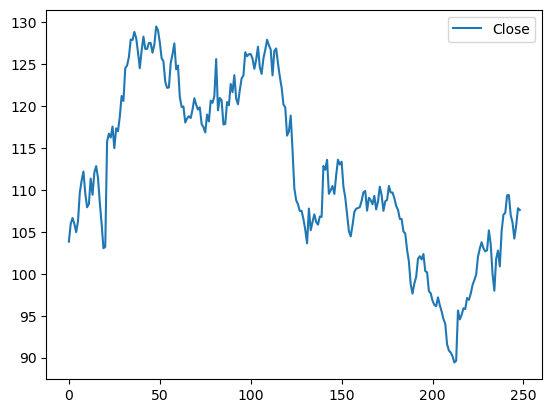

In [57]:
df.plot.line(y='Close', use_index = True)

In [58]:
df.reset_index(drop=True, inplace=True)

In [60]:
# Split dataset into training and testing
X = df[['Open', 'Close', 'High', 'Adj Close']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Implement Random Forest Regression Model
# n_estimators, in this case creates 100 estimator means
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train model
rf.fit(X_train, y_train)

# Make prediction on the test set
y_pred = rf.predict(X_test)

# Compute Mean Squared Error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07921708207825474


In [61]:
df.tail()

,Open,High,Low,Close,Adj Close
244,107.339996,107.830002,105.610001,106.110001,106.110001
245,105.370003,105.720001,104.180000,104.199997,104.199997
246,105.559998,107.099998,105.379997,105.750000,105.750000
247,106.820000,109.059998,106.720001,107.820000,107.820000
248,107.099998,108.000000,107.000000,107.610001,107.610001


In [69]:
# Experiment predictions using the model
import numpy as np

# Input array of stock price
# Create data using 224th row
stock_data = np.array([[107.339996, 106.110001, 107.830002, 106.110001]])

print('Predicted Stock Price:', rf.predict(stock_data))

Predicted Stock Price: [106.16330002]


/Users/kangin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



#### We can see that the predicted value is reasonably accurate.